<a href="https://colab.research.google.com/github/Santhoshreddy-aiml/2311CS020570-Excelr-/blob/main/AD_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
file_path="/content/motor_data_100000_rows.csv"

In [28]:
df = pd.read_csv(file_path)

In [29]:
df

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,56.853619,0.446974,149.322118,239.761094,3014.825236,40.013705,0.839609,1.679990,0.114625,0.642452,0.173706,0.995592,107
1,58.761100,0.725229,110.712491,152.469241,4190.807418,83.610075,1.468709,1.693692,0.554240,0.631679,0.255998,0.463637,192
2,52.548886,0.819306,140.051980,197.981683,3248.766600,94.188757,0.673312,0.754447,0.481255,0.804713,0.901008,0.746974,146
3,36.817317,0.518878,121.010177,219.382262,4734.804304,82.285024,1.566802,1.706549,0.889426,0.228397,0.449994,0.253302,135
4,22.388087,0.356189,133.547738,209.882312,4428.614807,87.174055,0.789857,1.659429,0.294209,0.345616,0.134764,0.568964,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,57.703693,0.643264,123.434959,175.642531,1733.361476,81.257108,1.107069,1.814537,0.227181,0.609515,0.486865,0.658476,189
99996,57.244904,0.384889,117.834848,173.746490,2874.440439,76.053320,1.661026,0.559988,0.770234,0.792455,0.700264,0.150806,118
99997,29.589841,0.200611,86.925758,207.704196,3878.642341,42.902997,1.269706,1.188926,0.254700,0.554952,0.368670,0.821132,145
99998,31.538716,0.976322,86.019010,183.349910,3297.044951,37.440898,1.681847,1.115449,0.986804,0.608563,0.753130,0.196996,104


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         100000 non-null  float64
 1   coolant         100000 non-null  float64
 2   u_d             100000 non-null  float64
 3   u_q             100000 non-null  float64
 4   motor_speed     100000 non-null  float64
 5   torque          100000 non-null  float64
 6   i_d             100000 non-null  float64
 7   i_q             100000 non-null  float64
 8   pm              100000 non-null  float64
 9   stator_yoke     100000 non-null  float64
 10  stator_tooth    100000 non-null  float64
 11  stator_winding  100000 non-null  float64
 12  profile_id      100000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.9 MB


In [31]:
print(df.isnull().sum())

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64


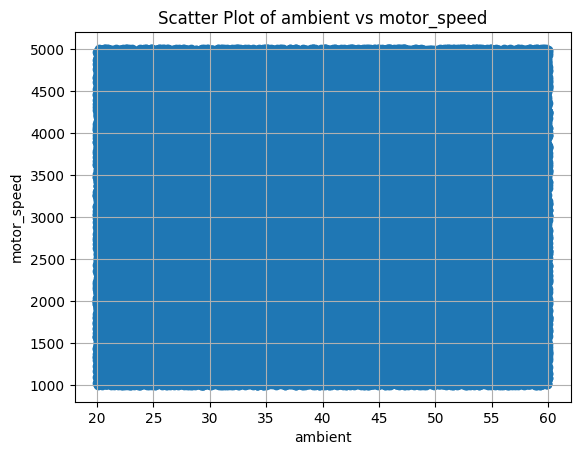

In [32]:
plt.scatter(df['ambient'], df['motor_speed'])
plt.xlabel('ambient')
plt.ylabel('motor_speed')
plt.title('Scatter Plot of ambient vs motor_speed')
plt.grid()
plt.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['ambient', 'motor_speed']] = scaler.fit_transform(df[['ambient', 'motor_speed']])
print(df.head())

    ambient   coolant         u_d         u_q  motor_speed     torque  \
0  0.921340  0.446974  149.322118  239.761094     0.503701  40.013705   
1  0.969029  0.725229  110.712491  152.469241     0.797700  83.610075   
2  0.813718  0.819306  140.051980  197.981683     0.562187  94.188757   
3  0.420416  0.518878  121.010177  219.382262     0.933701  82.285024   
4  0.059674  0.356189  133.547738  209.882312     0.857153  87.174055   

        i_d       i_q        pm  stator_yoke  stator_tooth  stator_winding  \
0  0.839609  1.679990  0.114625     0.642452      0.173706        0.995592   
1  1.468709  1.693692  0.554240     0.631679      0.255998        0.463637   
2  0.673312  0.754447  0.481255     0.804713      0.901008        0.746974   
3  1.566802  1.706549  0.889426     0.228397      0.449994        0.253302   
4  0.789857  1.659429  0.294209     0.345616      0.134764        0.568964   

   profile_id  
0         107  
1         192  
2         146  
3         135  
4         17

<Figure size 1000x600 with 0 Axes>

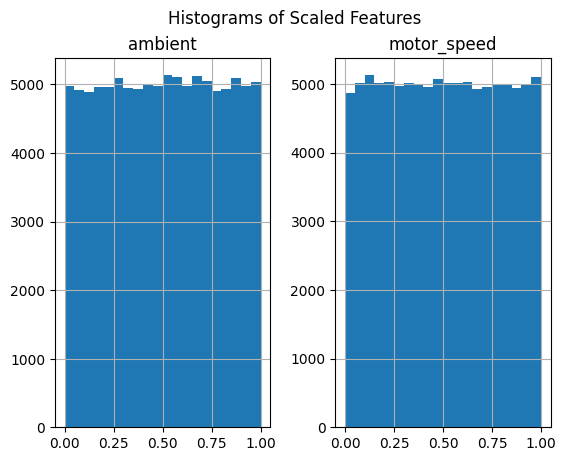

In [34]:
plt.figure(figsize=(10,6))
df[['ambient', 'motor_speed']].hist(bins=20)
plt.suptitle('Histograms of Scaled Features')
plt.show()

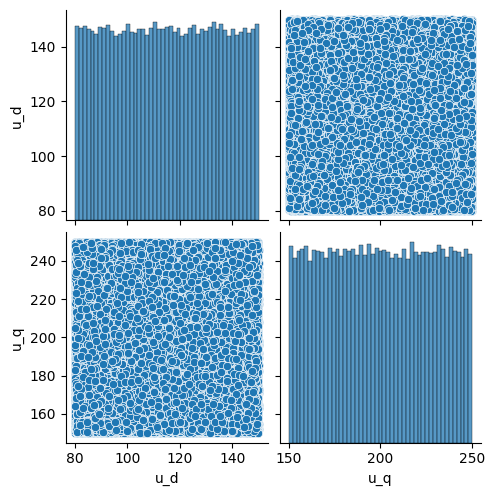

In [35]:
sns.pairplot(df[['u_d','u_q']])
plt.show()

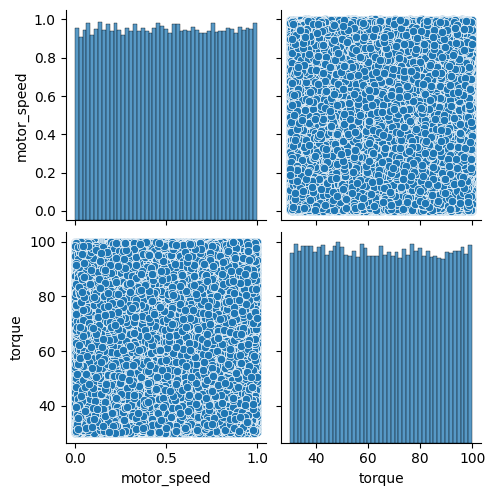

In [36]:
sns.pairplot(df[['motor_speed',	'torque']])
plt.show()

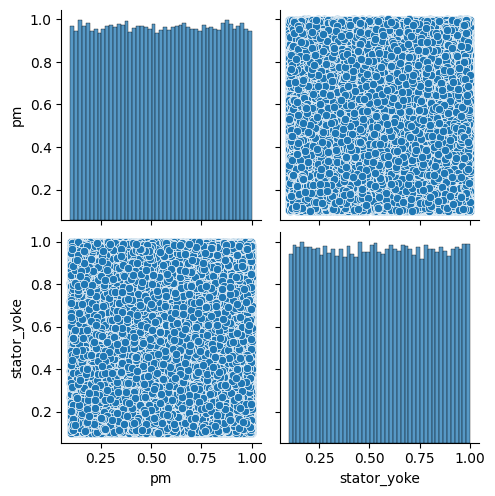

In [37]:
sns.pairplot(df[['pm',	'stator_yoke']])
plt.show()

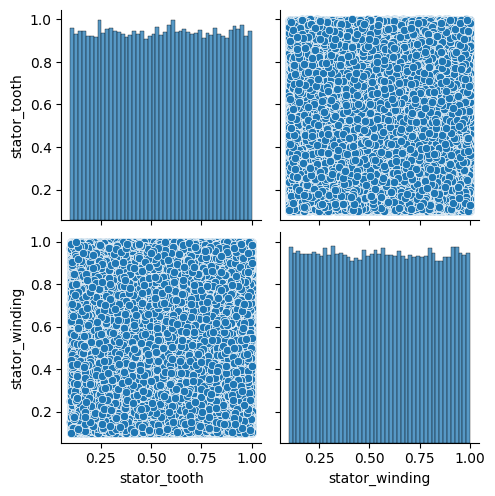

In [38]:
sns.pairplot(df[['stator_tooth',	'stator_winding']])
plt.show()

In [39]:
df.corr()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
ambient,1.000000,0.011194,-0.001423,0.002763,0.003983,-0.002625,-0.003273,0.000419,0.003442,0.002933,0.002524,0.000308,0.003400
coolant,0.011194,1.000000,0.001007,-0.001449,-0.002481,0.005516,-0.004321,-0.003093,-0.004210,0.000695,0.001274,0.001213,-0.004401
u_d,-0.001423,0.001007,1.000000,0.000419,0.001727,-0.001145,-0.002285,-0.003764,0.001822,-0.001898,-0.000947,0.005255,-0.003101
u_q,0.002763,-0.001449,0.000419,1.000000,0.000801,0.006574,-0.000725,-0.000303,-0.002461,0.003234,0.001669,-0.000929,0.003001
motor_speed,0.003983,-0.002481,0.001727,0.000801,1.000000,-0.002448,0.004001,0.000383,0.002765,0.003128,-0.001058,-0.002945,-0.000071
torque,-0.002625,0.005516,-0.001145,0.006574,-0.002448,1.000000,0.000538,0.000078,0.006655,0.001290,-0.002535,0.002991,-0.001602
i_d,-0.003273,-0.004321,-0.002285,-0.000725,0.004001,0.000538,1.000000,0.001442,0.001541,0.005253,0.002002,0.003314,0.007854
i_q,0.000419,-0.003093,-0.003764,-0.000303,0.000383,0.000078,0.001442,1.000000,0.001721,-0.003044,-0.001829,0.002713,0.001294
pm,0.003442,-0.004210,0.001822,-0.002461,0.002765,0.006655,0.001541,0.001721,1.000000,0.001439,-0.000726,0.001227,0.003446
stator_yoke,0.002933,0.000695,-0.001898,0.003234,0.003128,0.001290,0.005253,-0.003044,0.001439,1.000000,-0.000216,0.001428,0.003263


In [40]:
print("\nDataset Summary:")
print(df.describe())


Dataset Summary:
             ambient        coolant            u_d            u_q  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.501362       0.549724     114.982052     199.979089   
std         0.288130       0.259893      20.219789      28.861173   
min         0.000000       0.100006      80.000320     150.000194   
25%         0.252825       0.323921      97.490429     175.028065   
50%         0.503035       0.550577     114.932457     199.868174   
75%         0.749424       0.774223     132.510706     225.031837   
max         1.000000       0.999997     149.997567     249.999365   

         motor_speed         torque            i_d            i_q  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.500059      64.856785       1.250433       1.250326   
std         0.288680      20.257484       0.432160       0.433400   
min         0.000000      30.000372       0.500007       0.500016   
25%         0.2

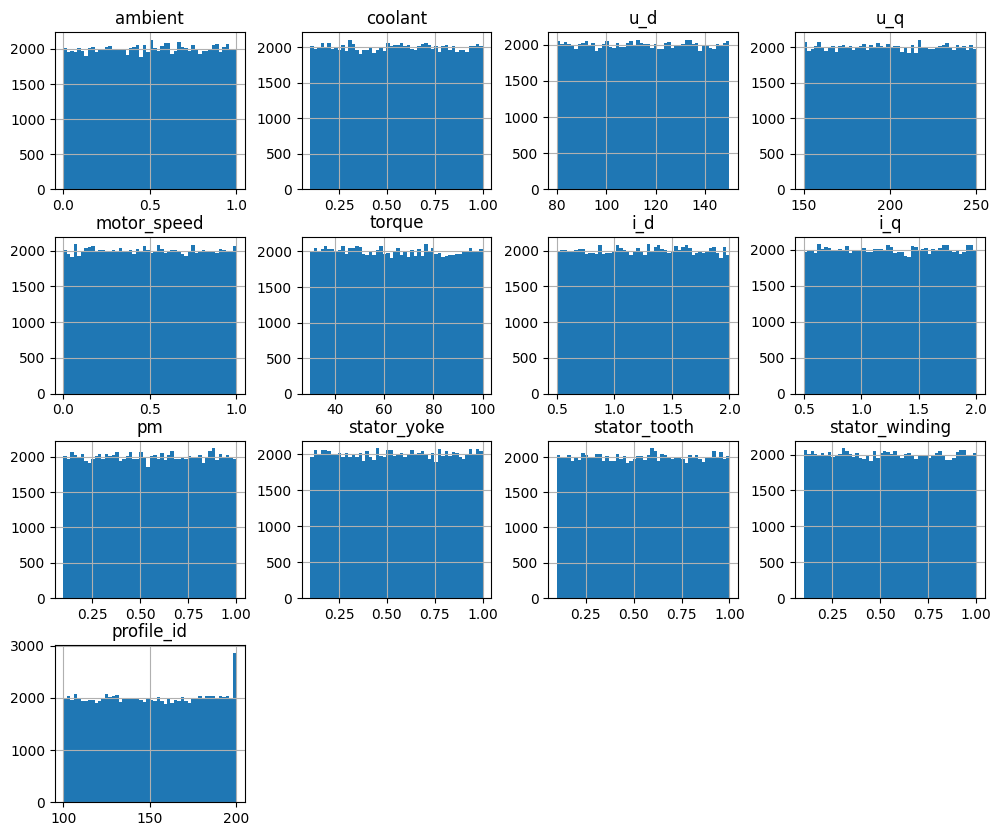

In [41]:
df.hist(figsize=(12, 10), bins=50)
plt.show()

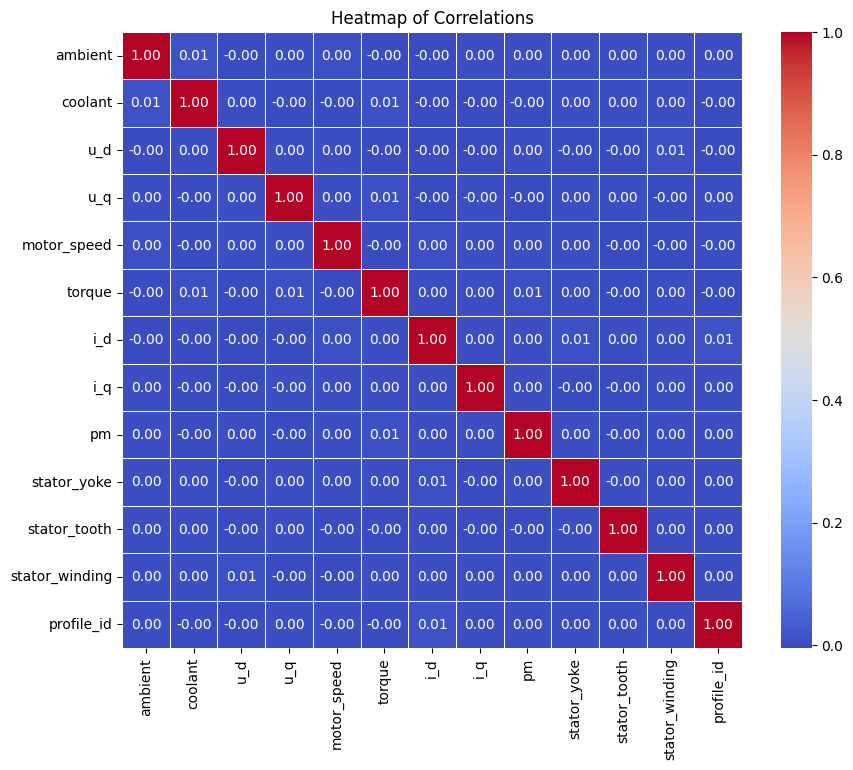

In [42]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

feature engineering

In [43]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd

# File and column names
file_name = '/content/motor_data_100000_rows.csv'
names = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d', 'i_q', 'pm',
         'stator_yoke', 'stator_tooth', 'stator_winding', 'profile_id']

# Load the dataset
dataframe = read_csv(file_name, header=None)
dataframe.columns = names

# Check for non-numeric columns
print("Data types:")
print(dataframe.dtypes)

# Convert non-numeric columns to numeric if possible
for col in dataframe.columns:
    if dataframe[col].dtype == 'object':  # Identify non-numeric columns
        print(f"Converting column '{col}' to numeric...")
        dataframe[col] = pd.to_numeric(dataframe[col], errors='coerce')  # Convert to numeric, setting errors as NaN

# Drop rows with NaN values resulting from conversion
dataframe.dropna(inplace=True)

# Define features (X) and target (Y)
X = dataframe[['coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d', 'i_q']].values
Y = dataframe['pm'].values

# Feature selection
test = SelectKBest(score_func=f_regression, k=4)  # Use f_regression for regression problems
fit = test.fit(X, Y)

# Display scores
set_printoptions(precision=3)
print("Feature scores:", fit.scores_)

# Transform to selected features
features = fit.transform(X)
print("Selected features shape:", features.shape)


<ipython-input-43-7d3bcf1a448c>:13: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = read_csv(file_name, header=None)


Data types:
ambient           object
coolant           object
u_d               object
u_q               object
motor_speed       object
torque            object
i_d               object
i_q               object
pm                object
stator_yoke       object
stator_tooth      object
stator_winding    object
profile_id        object
dtype: object
Converting column 'ambient' to numeric...
Converting column 'coolant' to numeric...
Converting column 'u_d' to numeric...
Converting column 'u_q' to numeric...
Converting column 'motor_speed' to numeric...
Converting column 'torque' to numeric...
Converting column 'i_d' to numeric...
Converting column 'i_q' to numeric...
Converting column 'pm' to numeric...
Converting column 'stator_yoke' to numeric...
Converting column 'stator_tooth' to numeric...
Converting column 'stator_winding' to numeric...
Converting column 'profile_id' to numeric...
Feature scores: [1.772 0.332 0.606 0.764 4.429 0.237 0.296]
Selected features shape: (100000, 4)


DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the dataset
file_path = '/content/motor_data_100000_rows.csv'
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data.drop(columns=['pm'])
y = data['pm']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree Regressor model
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.13536476095940783


In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
array = df.values
X = array[:,0:3]
Y = array[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [47]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [48]:
model.score(X_test,y_test)

-1.0081476608371474

SVR

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

file_path = r'/content/motor_data_100000_rows.csv'
column_names = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d', 'i_q', 'pm',
                'stator_yoke', 'stator_tooth', 'stator_winding', 'profile_id']
data = pd.read_csv(file_path, header=None, names=column_names)
print(data.head())

# The target variable is 'pm', not 'Outcome'
X = data.drop('pm', axis=1)  # Change 'Outcome' to 'pm'
y = data['pm']  # Change 'Outcome' to 'pm'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (negative MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

<ipython-input-50-1dcb746f9130>:10: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, header=None, names=column_names)


              ambient             coolant                 u_d  \
0             ambient             coolant                 u_d   
1  56.853618836676176  0.4469742977319322  149.32211826214896   
2  58.761099749229956  0.7252291276629198  110.71249057202208   
3   52.54888601848645  0.8193062224774609  140.05198026103676   
4  36.817317050133326    0.51887842272804   121.0101771602423   

                  u_q         motor_speed             torque  \
0                 u_q         motor_speed             torque   
1  239.76109354676396   3014.825235964011  40.01370520716456   
2  152.46924087080734   4190.807417548967  83.61007541450599   
3  197.98168339405208  3248.7666004353005  94.18875666805681   
4  219.38226181399864   4734.804304304253  82.28502374522608   

                  i_d                 i_q                   pm  \
0                 i_d                 i_q                   pm   
1  0.8396091773690083  1.6799901651413862  0.11462503412148822   
2  1.4687088154555377  1.6